In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("OnlineNewsPopularity.csv")
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
#removal of empty spaces in column name
data.columns=data.columns.str.rstrip()
data.columns=data.columns.str.lstrip()

In [4]:
#shape of the data
data.shape

(39644, 61)

In [5]:
#information about data types of features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [6]:
#checking for null values
data.isnull().sum().sum()

0

In [7]:
#statistical information of the features
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


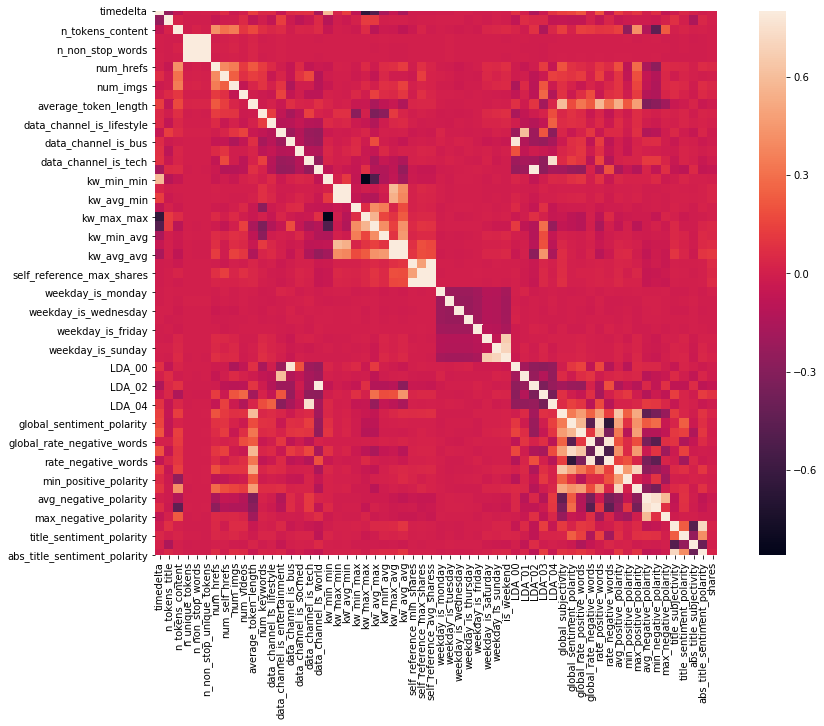

In [13]:
#correlation between features and heat map
fig = plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), vmax = .8,square = True)
plt.show()

In [4]:
data.drop('url',axis=1,inplace=True)

### Univariate Analysis

#### 1.n_tokens_title

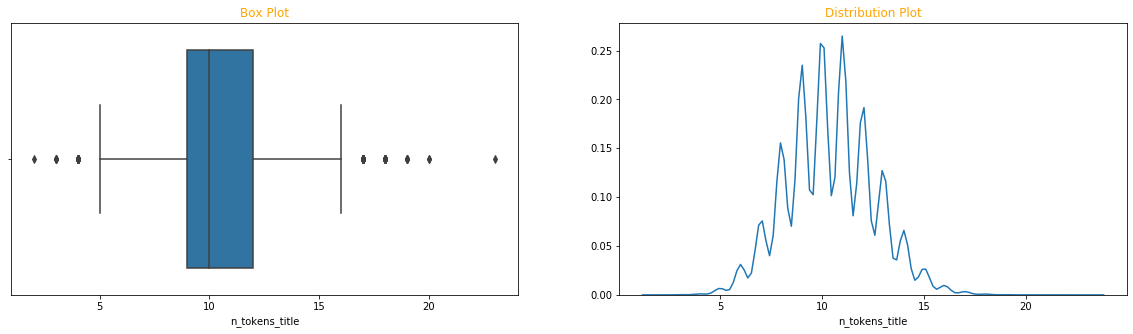

In [15]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['n_tokens_title'],ax=axes[0])
sns.distplot(data['n_tokens_title'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 2.n_tokens_content

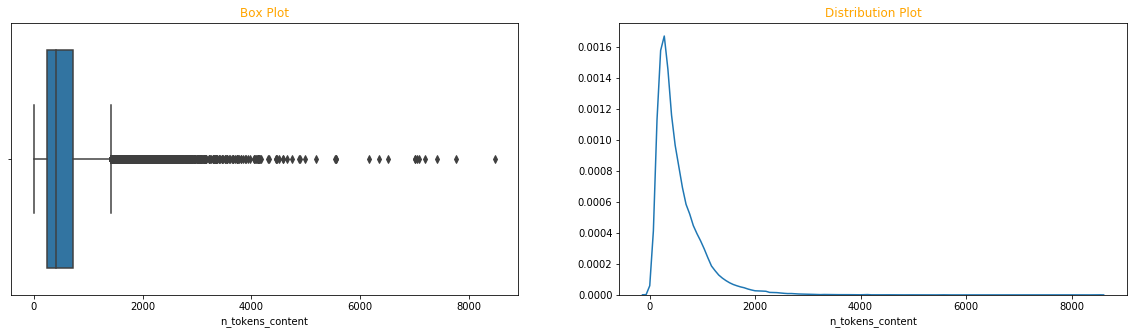

In [16]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['n_tokens_content'],ax=axes[0])
sns.distplot(data['n_tokens_content'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 3.n_unique_tokens

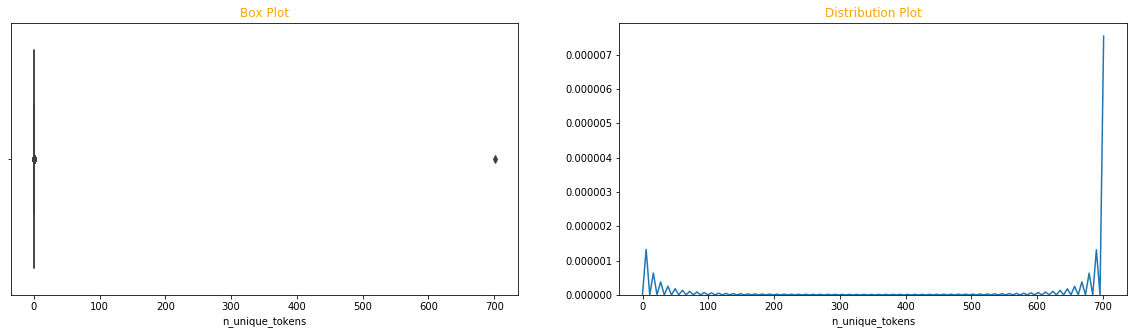

In [17]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['n_unique_tokens'],ax=axes[0])
sns.distplot(data['n_unique_tokens'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 4.kw_avg_avg

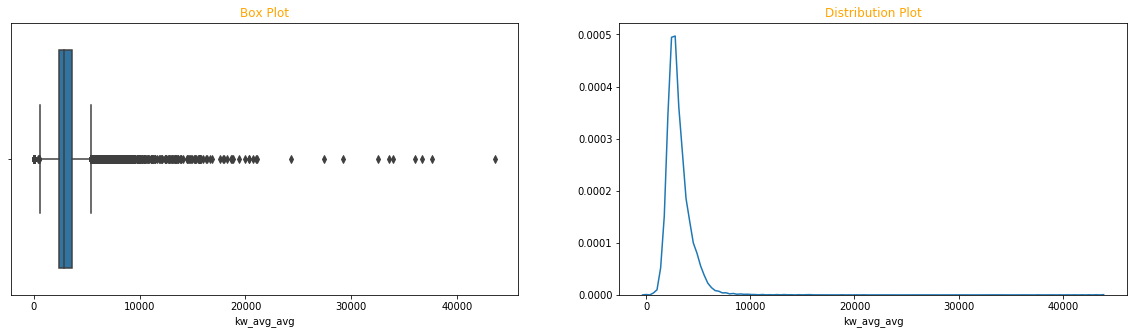

In [18]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['kw_avg_avg'],ax=axes[0])
sns.distplot(data['kw_avg_avg'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 5.self_reference_avg_sharess

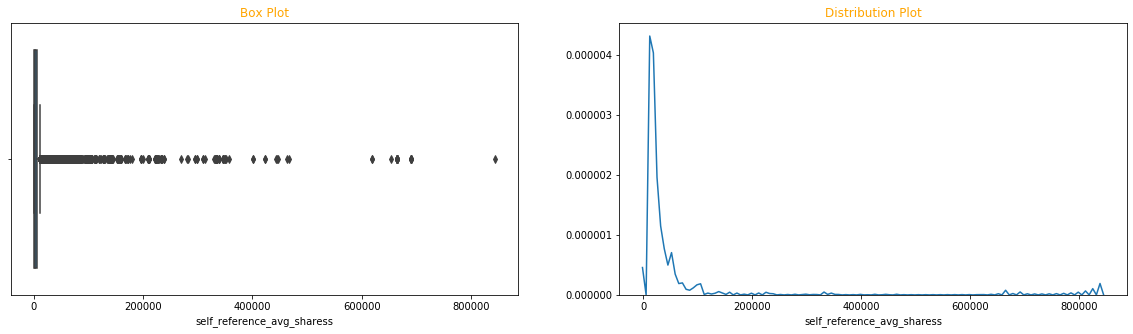

In [19]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['self_reference_avg_sharess'],ax=axes[0])
sns.distplot(data['self_reference_avg_sharess'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 6.avg_positive_polarity

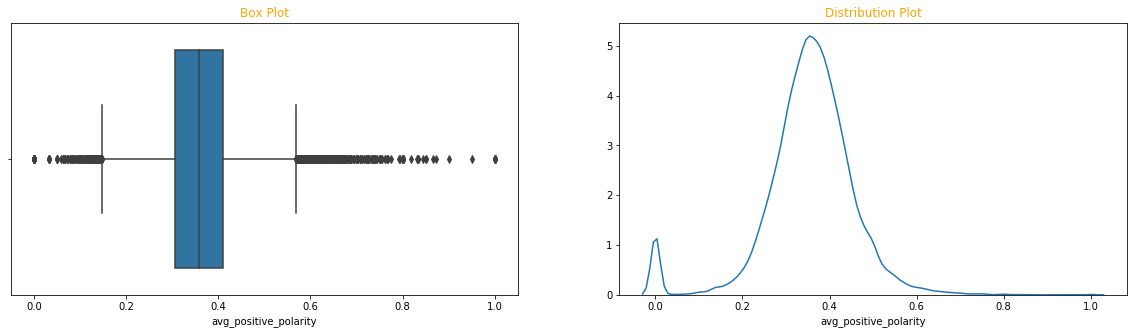

In [20]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['avg_positive_polarity'],ax=axes[0])
sns.distplot(data['avg_positive_polarity'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 7.avg_negative_polarity

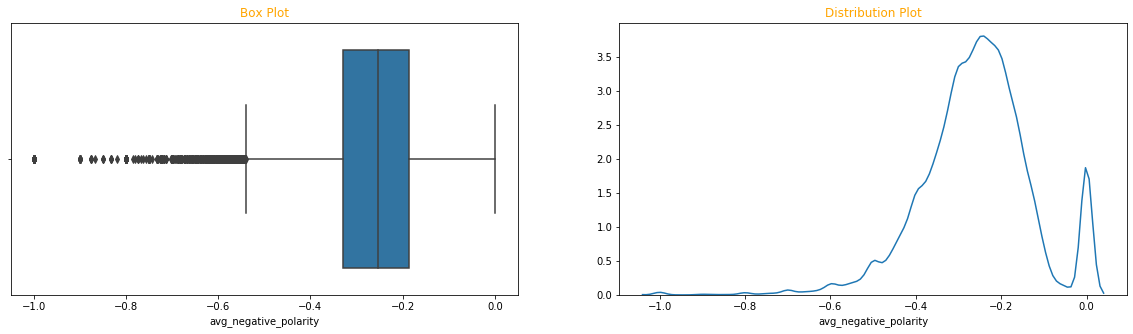

In [21]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['avg_negative_polarity'],ax=axes[0])
sns.distplot(data['avg_negative_polarity'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 8.abs_title_subjectivity

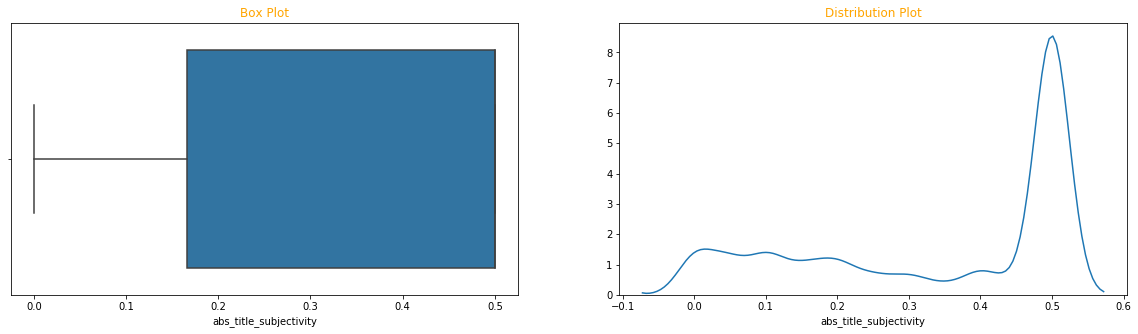

In [22]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['abs_title_subjectivity'],ax=axes[0])
sns.distplot(data['abs_title_subjectivity'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

#### 9. Articles Published per Day

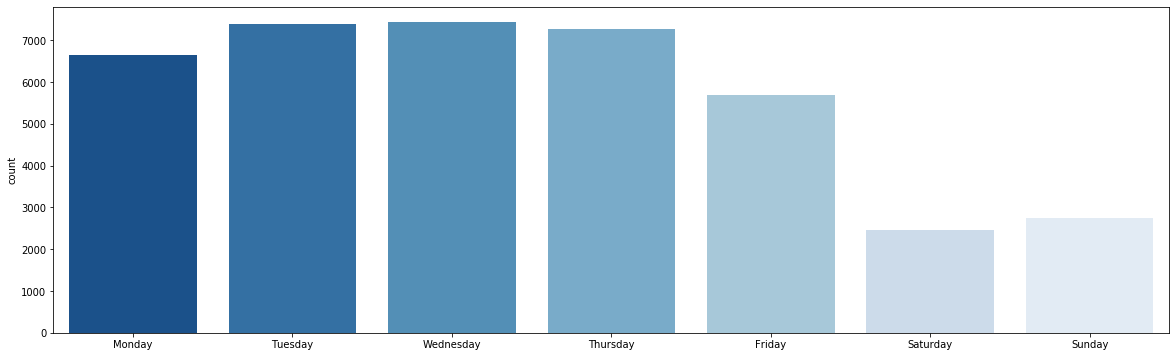

In [23]:
weekday = pd.get_dummies(data[['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']]).idxmax(1)
weekday.replace({'weekday_is_monday' :'Monday',
'weekday_is_tuesday':'Tuesday',
'weekday_is_wednesday':'Wednesday',
'weekday_is_thursday':'Thursday',
'weekday_is_friday':'Friday',
'weekday_is_saturday':'Saturday',
'weekday_is_sunday':'Sunday'} , inplace = True)
plt.figure(figsize=(20,6))
sns.countplot(weekday, palette = "Blues_r")
plt.show()

#### 10.Articles published per Channel.

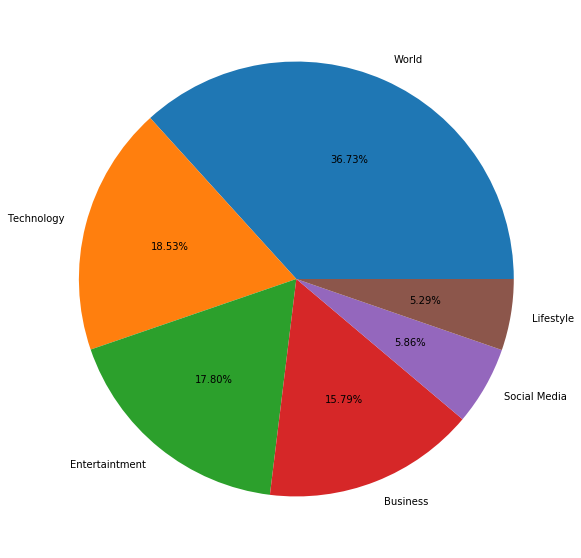

In [5]:
#To replace each category with specific number
data['data_channel_is_lifestyle'].replace(to_replace=1,value=1,inplace=True)
data['data_channel_is_entertainment'].replace(to_replace=1,value=2,inplace=True)
data['data_channel_is_bus'].replace(to_replace=1,value=3,inplace=True)
data['data_channel_is_socmed'].replace(to_replace=1,value=4,inplace=True)
data['data_channel_is_tech'].replace(to_replace=1,value=5,inplace=True)
data['data_channel_is_world'].replace(to_replace=1,value=0,inplace=True)

#Combining into one column
data['channel']=data.apply(lambda row:row['data_channel_is_lifestyle']+row['data_channel_is_entertainment']
                    +row['data_channel_is_bus']+row['data_channel_is_socmed']+row['data_channel_is_tech']
                    +row['data_channel_is_world'],axis=1)

#Providing category name for respective number
data['channel'].replace({1:'Lifestyle',2:'Entertaintment',3:'Business',4:'Social Media',5:'Technology',0:'World'},inplace=True)

fig = plt.figure(figsize = (15,10))
plt.pie(data['channel'].value_counts(),labels=data['channel'].value_counts().index,autopct='%1.2f%%')
plt.show()

#### 11.Title_sentiment_polarity

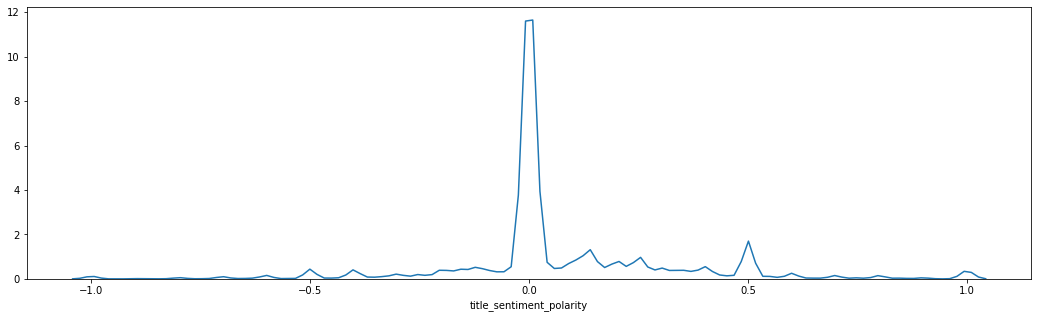

In [25]:
plt.subplots(1,1,figsize=(18,5))
sns.distplot(data['title_sentiment_polarity'],hist=False)
plt.show()

#### 12.Shares

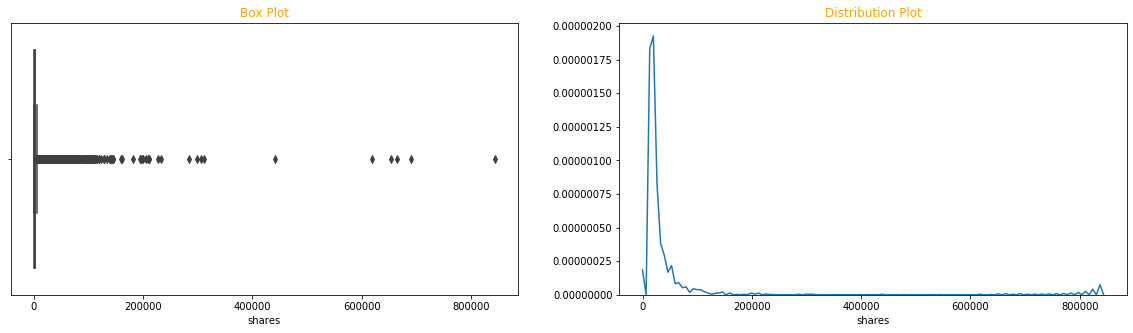

In [26]:
fig,axes=plt.subplots(1,2,figsize=(20,5))
sns.boxplot(data['shares'],ax=axes[0])
sns.distplot(data['shares'],ax=axes[1],hist=False)
axes[0].set_title('Box Plot',color='orange')
axes[1].set_title('Distribution Plot',color='orange')
plt.show()

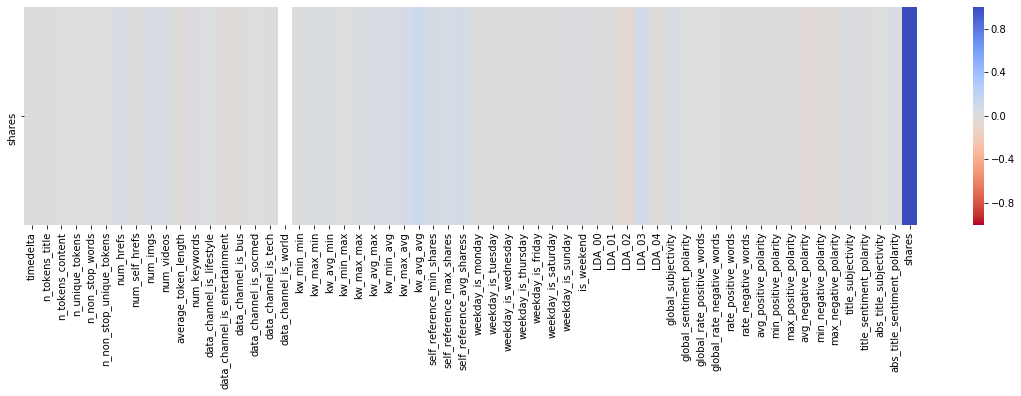

In [27]:
plt.figure(figsize=(20,4))
sns.heatmap(data.corr().loc[['shares'],:] ,cmap="coolwarm_r",vmin = -1, vmax= 1)
plt.show()

In [28]:
abs(data.corr()["shares"]).sort_values().tail(10)

num_hrefs                     0.045404
self_reference_max_shares     0.047115
self_reference_min_shares     0.055958
self_reference_avg_sharess    0.057789
LDA_02                        0.059163
kw_max_avg                    0.064306
LDA_03                        0.083771
kw_avg_avg                    0.110413
shares                        1.000000
data_channel_is_world              NaN
Name: shares, dtype: float64

### Bivariate Analysis

#### Title Tokens vs Shares

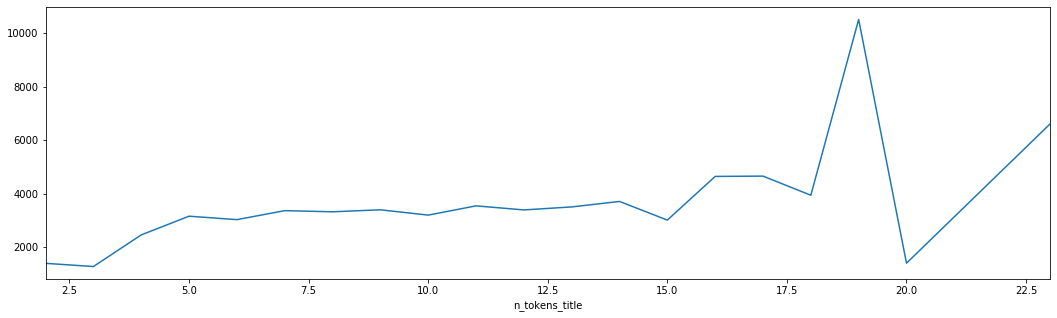

In [29]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('n_tokens_title').mean()['shares'].plot(kind='line')
plt.show()

#### No of Tokens vs Shares

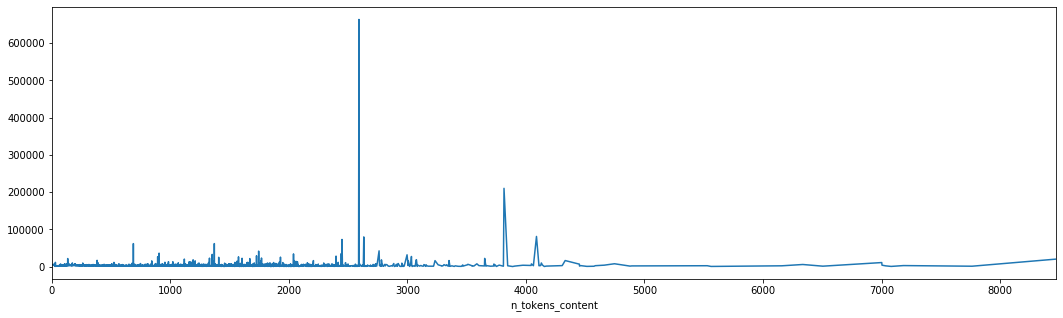

In [30]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('n_tokens_content').mean()['shares'].plot(kind='line')
plt.show()

#### No of Images vs Shares

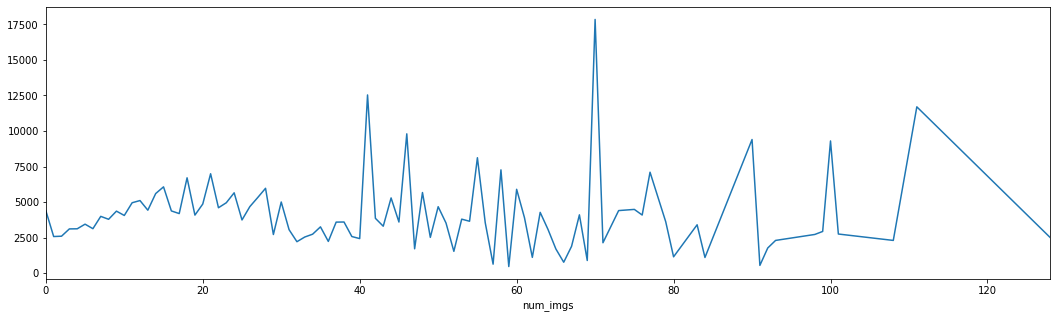

In [31]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_imgs').mean()['shares'].plot(kind='line')
plt.show()

#### No of Videos vs Shares

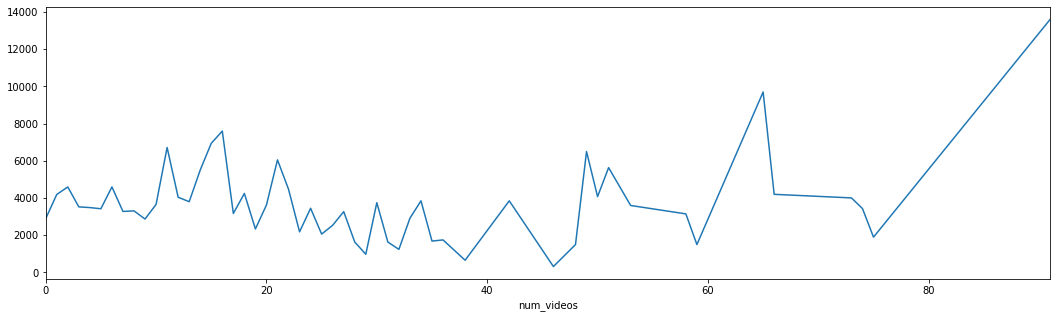

In [32]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_videos').mean()['shares'].plot(kind='line')
plt.show()

#### No of Referenced Links vs Shares

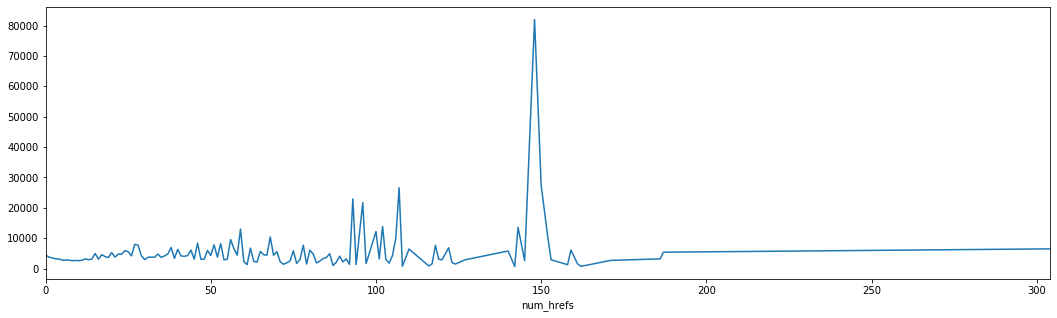

In [33]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_hrefs').mean()['shares'].plot(kind='line')
plt.show()

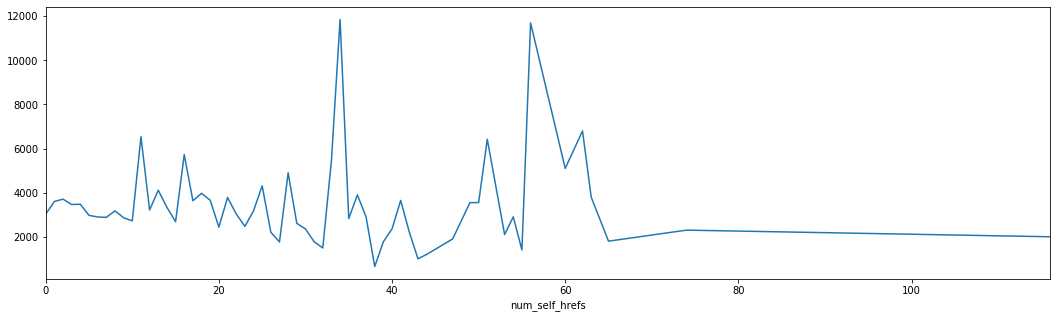

In [34]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_self_hrefs').mean()['shares'].plot(kind='line')
plt.show()

#### No. of Keywords vs Shares

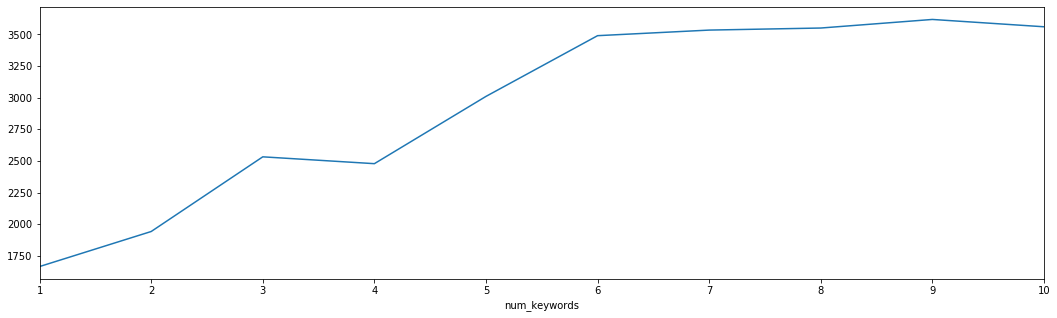

In [35]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('num_keywords').mean()['shares'].plot(kind='line')
plt.show()

#### Sentiment Polarity vs Shares

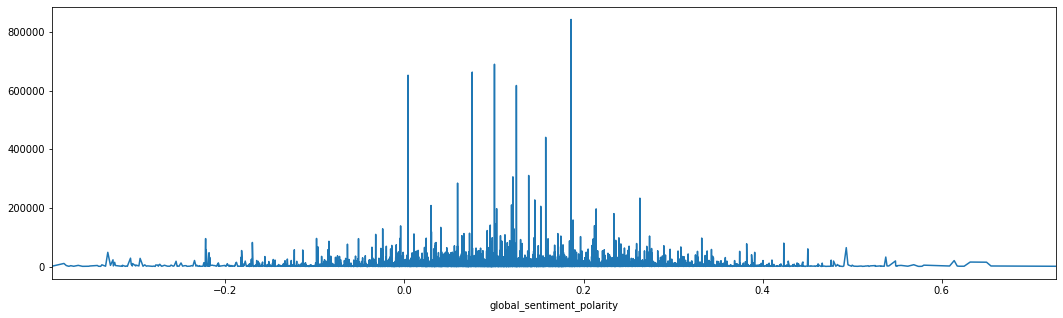

In [36]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('global_sentiment_polarity').mean()['shares'].plot(kind='line')
plt.show()

#### Rate of Negative Words vs Shares

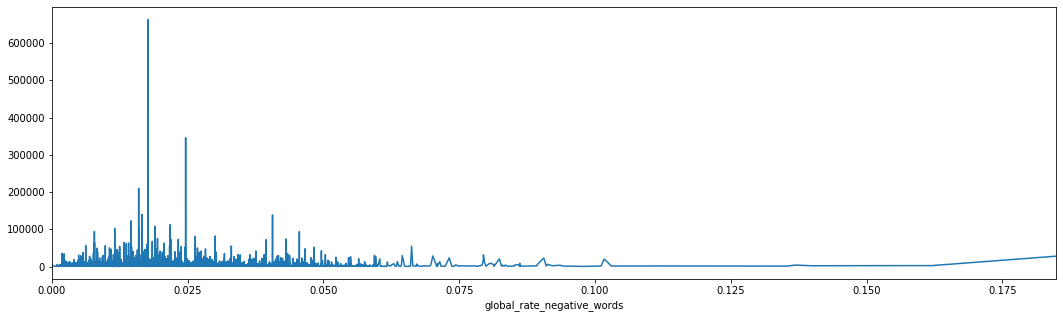

In [37]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('global_rate_negative_words').mean()['shares'].plot(kind='line')
plt.show()

#### Average Token Length vs Shares

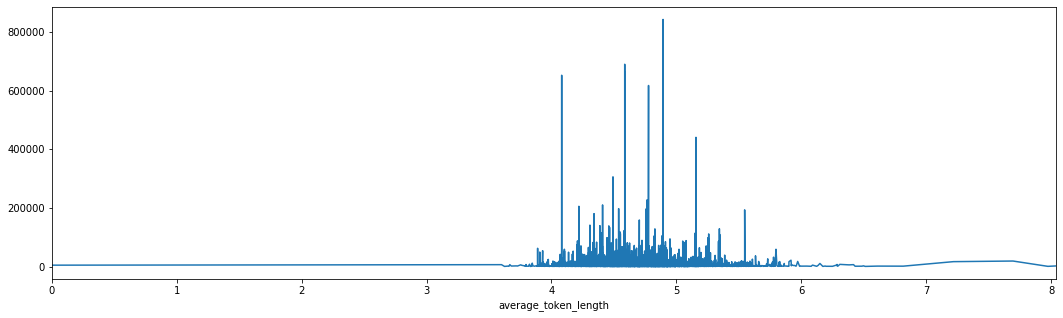

In [38]:
fig,axes=plt.subplots(1,1,figsize=(18,5))
data.groupby('average_token_length').mean()['shares'].plot(kind='line')
plt.show()

### ------------------------------------------------------------------- END OF EDA--------------------------------------------------------------------------

In [6]:
data1 = data.copy()
data1.drop("channel", axis = 1, inplace = True)
#Removing 'channel' column for outliers,since it already dummified.
data1.drop(31037,inplace=True)
#dropping 31037th row,since it has wrong datas
data1.index=range(len(data1))

#### Data Cleaning-Removal of Outliers

In [7]:
#creating a function to check outlier percentage
def outlier_per(col):
    values=col
    q1=np.quantile(values,0.25)
    q3=np.quantile(values,0.75)
    iqr=q3-q1
    ul=q3+(1.5*iqr)
    ll=q1-(1.5*iqr)
    per=((len(values[values>ul])+len(values[values<ll]))/len(values))*100#((number of outliers in the particular column/length of the column)*100)
    return(ul,ll,per)

In [8]:
#creating a function to check outlier percentage after transforming
def outliers_det(col):
    values=col
    #print('Outlier Detection:')
    ul,ll,per=outlier_per(values)
    log_values=np.log1p(values)
    ull,lll,perl=outlier_per(log_values)
    #print('Outlier Percentage after log transformation:',perl)
    root_values=np.sqrt(values)
    uls,lls,pers=outlier_per(root_values)
    #print('Outlier Percentage after sqrt transformation:',pers)
    rem_values=values[(values<ul) & (values>ll)]
    if len(rem_values)>0:
        ulr,llr,perr=outlier_per(rem_values)
        #print('Outlier Percentage after removal:',perr)
    else:
        #print('No remaining values')
        perr='No Values'
    return(per,perl,pers,perr)

In [9]:
#running a for loop through all the columns to find the outlier percent by the above function.
print('Outlier detection of all the columns:\n')
column_name=[]
per_list=[]
perl_list=[]
pers_list=[]
perr_list=[]
for i in data1.columns:
    if ('weekday' not in i) and ('weekend' not in i) and ('data_channel' not in i):
        per,perl,pers,perr=outliers_det(data1[i])
        column_name.append(i)
        per_list.append(per)
        perl_list.append(perl)
        pers_list.append(pers)
        perr_list.append(perr)
out_det_df=pd.DataFrame({'Column Name':column_name,'Before Transformation':per_list,
                         'After Log Transformation':perl_list,
                        'After Square Root Transformation':pers_list,'After removal':perr_list})
out_det_df

Outlier detection of all the columns:



,Column Name,Before Transformation,After Log Transformation,After Square Root Transformation,After removal
0,timedelta,0.000000,2.353505,0.000000,0
1,n_tokens_title,0.393512,0.572611,0.628106,0
2,n_tokens_content,4.873496,3.291880,2.010443,1.81929
3,n_unique_tokens,4.043589,3.864491,3.932598,0.260252
4,n_non_stop_words,7.128623,7.128623,7.128623,2.00179
5,n_non_stop_unique_tokens,4.368993,4.457281,4.502686,0.429954
6,num_hrefs,5.471332,0.335494,2.313145,2.81259
7,num_self_hrefs,5.269531,1.218374,2.282875,0
8,num_imgs,19.428398,5.950609,11.527886,43.2735
9,num_videos,7.431325,5.483944,4.815478,0


In [10]:
#creating a function treat the outliers whichever transformation/removal is effective
def outliers_treating(df,col):
    #print('Outlier Treating:')
    values=df[col]
    ul,ll,per=outlier_per(values)
    #print('Outlier Percentage before transformation:',per)
    log_values=np.log1p(values)
    ull,lll,perl=outlier_per(log_values)
    root_values=np.sqrt(values)
    uls,lls,pers=outlier_per(root_values)
    rem_values=values[(values<ul) & (values>ll)]
    if len(rem_values)>0:
        ulr,llr,perr=outlier_per(rem_values)
    neg_counter=0    
    for i in values:
        if i<0:
            neg_counter+=1
    if per>0:
        min_treatment=np.min([pers,perl])
        min_treatment_arg=np.argmin([pers,perl])
        treated_values=[root_values,log_values]
        transformation=['Square Root Transformation','Log (X+1) transformation']
        if ((per-min_treatment)/per)>0.2 and neg_counter==0:
            new_values=treated_values[min_treatment_arg]
            #print('Transformation done:',transformation[min_treatment_arg])
            trans_name=transformation[min_treatment_arg]
            df[col]=new_values
        else:
            if len(rem_values)>0:
                if per<5 and ((per-perr)/per)>=0.7:
                    df=df[(df[col]<ul) & (df[col]>ll)]
                    #print('Transformation done:','Removed Outliers since it is less than 5%')
                    trans_name='Removal'
                else:
                    #print('Transformation done:','No transformation is effective or large loss of data')
                    trans_name='NO transformation/removal is effective.'
            else:
                    #print('No values after removing. No transformation done.')
                    trans_name='NO transformation/removal is effective.'
    else:
        trans_name='No need for transformation.'
    return(df,trans_name)

In [11]:
df_ot=data1.copy()
print('Outlier detection of all the columns:\n')
column_name=[]
trans_list=[]
for i in df_ot.columns:
    if ('weekday' not in i) and ('weekend' not in i) and ('data_channel' not in i):
        df_ot,trans_name=outliers_treating(df_ot,i)
        column_name.append(i)
        trans_list.append(trans_name)
out_det_treat=pd.DataFrame({'Column Name':column_name,'Transformation Done':trans_list})
out_det_treat

Outlier detection of all the columns:



,Column Name,Transformation Done
0,timedelta,No need for transformation.
1,n_tokens_title,Removal
2,n_tokens_content,Square Root Transformation
3,n_unique_tokens,Removal
4,n_non_stop_words,Removal
5,n_non_stop_unique_tokens,Removal
6,num_hrefs,Log (X+1) transformation
7,num_self_hrefs,Log (X+1) transformation
8,num_imgs,Log (X+1) transformation
9,num_videos,Square Root Transformation


### --------------------------------------------------------- END OF Outlier Treatment---------------------------------------------------------------

### Statistical Analysis of Dataset

####  Loading the dataset which is outlier treated by the above process.

In [12]:
df=df_ot.copy()
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731.0,12.0,14.798649,0.663594,1.0,0.815385,1.609438,1.098612,0.693147,0.0,...,0.316228,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.433013,6.386879
1,731.0,9.0,15.968719,0.604743,1.0,0.791946,1.386294,0.693147,0.693147,0.0,...,0.182574,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,6.568078
3,731.0,9.0,23.043437,0.503788,1.0,0.665635,2.302585,0.000000,0.693147,0.0,...,0.369274,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,7.090910
4,731.0,13.0,32.741411,0.415646,1.0,0.540890,2.995732,2.995732,3.044522,0.0,...,0.182574,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.369274,6.226537
5,731.0,10.0,19.235384,0.559889,1.0,0.698198,1.098612,1.098612,0.000000,0.0,...,0.369274,0.6,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.462910,6.752270


In [13]:
#removal of empty spaces in column name
df.columns=df.columns.str.rstrip()
df.columns=df.columns.str.lstrip()

#### Statiscal Significance between target column and independent variables

In [94]:
df.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'glob

In [95]:
cat_cols=['data_channel_is_entertainment','data_channel_is_lifestyle','data_channel_is_bus',
         'data_channel_is_socmed','data_channel_is_tech','data_channel_is_world',
         'weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday',
         'weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
cont_cols=[]
for i in df.columns:
    if i not in cat_cols:
        cont_cols.append(i)
print('Categorical Columns:\n',cat_cols)
print('Continous Columns:\n',cont_cols)

Categorical Columns:
 ['data_channel_is_entertainment', 'data_channel_is_lifestyle', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']
Continous Columns:
 ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negativ

#### Performing the normality test of the target column before performing the statistical tests between indpendent and independent variables.

In [96]:
from scipy.stats import kstest

In [222]:
stat,pval=kstest(df['shares'],'norm')
print('Stat Value:',stat,'P Value:',pval)
if pval>0.05:
    print('Normal Distribution (Gaussian)')
else:
    print('There is no Normal Distribution')

Stat Value: 0.9997662334628614 P Value: 0.0
There is no Normal Distribution


<b>Since the Distribution of the target column is not normal, we need to perform only non paramteric tests.

In [98]:
from scipy.stats import kruskal

In [99]:
stat_list=[]
pval_list=[]
result=[]
for i in cat_cols:
    data1=df[df[i]==0]['shares']
    data2=df[df[i]==1]['shares']
    stat,pval=kruskal(data1,data2)
    stat_list.append(stat)
    pval_list.append(pval)
    if pval<0.05:
        result.append('Significant')
    else:
        result.append('Not Significant')
pd.DataFrame({'Column':cat_cols,'Stat Value':stat_list,'P Value':pval_list,'Significance':result})

,Column,Stat Value,P Value,Significance
0,data_channel_is_entertainment,NaN,NaN,Not Significant
1,data_channel_is_lifestyle,59.399517,1.287007e-14,Significant
2,data_channel_is_bus,NaN,NaN,Not Significant
3,data_channel_is_socmed,NaN,NaN,Not Significant
4,data_channel_is_tech,NaN,NaN,Not Significant
5,data_channel_is_world,NaN,NaN,Not Significant
6,weekday_is_monday,10.455867,1.222605e-03,Significant
7,weekday_is_tuesday,54.041685,1.962810e-13,Significant
8,weekday_is_wednesday,60.081599,9.100518e-15,Significant
9,weekday_is_thursday,39.403854,3.446161e-10,Significant


<b>Performing Statistical Test for Continous Independent Variables and the Target Variable.

In [100]:
corr_vals=df[cont_cols].corr()
print(corr_vals['shares'])

timedelta                       0.038248
n_tokens_title                 -0.031780
n_tokens_content                0.032010
n_unique_tokens                -0.031134
n_non_stop_words                0.002068
n_non_stop_unique_tokens       -0.051209
num_hrefs                       0.115922
num_self_hrefs                  0.064189
num_imgs                        0.098580
num_videos                      0.061703
average_token_length           -0.064787
num_keywords                    0.069581
kw_min_min                      0.031956
kw_max_min                      0.033668
kw_avg_min                      0.042226
kw_min_max                      0.038681
kw_max_max                     -0.006205
kw_avg_max                      0.043711
kw_min_avg                      0.116028
kw_max_avg                      0.163650
kw_avg_avg                      0.187171
self_reference_min_shares       0.167511
self_reference_max_shares       0.158326
self_reference_avg_sharess      0.180348
LDA_00          

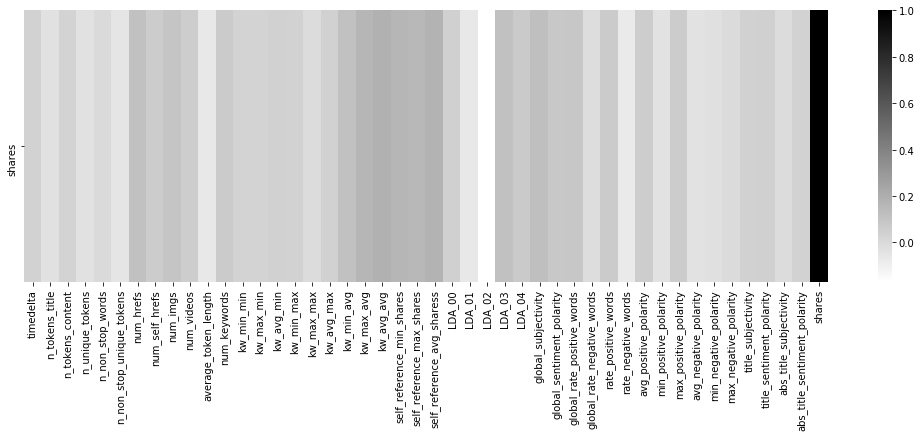

In [101]:
plt.subplots(1,1,figsize=(18,5))
sns.heatmap(corr_vals[['shares']].T,cmap='gray_r')
plt.show()

In [102]:
print('Top 10 positively correlated features:')
print(corr_vals['shares'].sort_values(ascending=False).head(10))

Top 10 positively correlated features:
shares                        1.000000
kw_avg_avg                    0.187171
self_reference_avg_sharess    0.180348
self_reference_min_shares     0.167511
kw_max_avg                    0.163650
self_reference_max_shares     0.158326
global_subjectivity           0.126159
kw_min_avg                    0.116028
num_hrefs                     0.115922
LDA_03                        0.114358
Name: shares, dtype: float64


In [103]:
print('Top 10 negatively correlated features:')
print(corr_vals['shares'].sort_values(ascending=True).head(10))

Top 10 negatively correlated features:
LDA_02                     -0.170575
rate_negative_words        -0.070795
average_token_length       -0.064787
LDA_01                     -0.063297
n_non_stop_unique_tokens   -0.051209
avg_negative_polarity      -0.037260
min_positive_polarity      -0.035873
n_tokens_title             -0.031780
n_unique_tokens            -0.031134
min_negative_polarity      -0.025590
Name: shares, dtype: float64


### ---------------------------------------------------------- END OF Statistical Test------------------------------------------------------------------

### Splitting the Dataset

In [14]:
# splitting the dataset into x and y
X=df.drop('shares',axis=1)
y=df['shares']

In [15]:
from sklearn.model_selection import train_test_split
from statsmodels.api import add_constant

In [16]:
#splitting the dataset into train and test datasets for validating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19872, 59), (8517, 59), (19872,), (8517,))

In [33]:
#checking if train and test are good representation of the population
from scipy.stats import ttest_ind
tstat_train,pval_train=ttest_ind(X,X_train,nan_policy="omit")
tstat_test,pval_test=ttest_ind(X,X_test,nan_policy="omit")
pval_train,pval_test

(array([0.90304313, 0.83660197, 0.3980498 , 0.31759123, 0.35385947,
        0.39731927, 0.72472107, 0.60414981, 0.8181046 , 0.70837837,
        0.955969  , 0.56469765, 0.70729915, 0.56484723, 0.74960276,
        0.85661377, 0.96505907,        nan, 0.97466939, 0.73979717,
        0.85290566, 0.99053865, 0.70349504, 0.72892102, 0.96467432,
        0.3165954 , 0.5116553 , 0.42359126, 0.68106693, 0.50150335,
        0.83396644, 0.45954443, 0.63449153, 0.7492246 , 0.77136482,
        0.69155552, 0.75923205, 0.60691928, 0.72022229, 0.66264815,
        0.30957986, 0.72111957, 0.76833123, 0.71374052, 0.90562201,
        0.24743572, 0.82853005, 0.62593285, 0.62593285, 0.40262846,
        0.95724095, 0.4635854 , 0.72170288, 0.60754304, 0.94883145,
        0.56277626, 0.98060312, 0.85475918, 0.70731997]),
 array([0.83122765, 0.71954143, 0.13891748, 0.08128136, 0.10712823,
        0.1389449 , 0.53863697, 0.36652922, 0.68814079, 0.51132995,
        0.92324391, 0.31528469, 0.51448717, 0.31674604, 0.

- As the pval>0.05 for all the features we can say that x_train is a good representation of x.
- As the pval>0.05 for all the features we can say that x_test is a good representation of x.

### Building Base Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [206]:
#fitting of Linear Regression Model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)
#prediciting y
y_pred=lin_reg.predict(X_test)
#r2_score
print('R^2 score of the model is:',r2_score(y_test,y_pred))
#MSE
print('MSE of the model is:',mean_squared_error(y_test,y_pred))
#RMSE Of the Model
print('RMSE of the model is:',np.sqrt(mean_squared_error(y_test,y_pred)))

R^2 score of the model is: 0.14134748688071797
MSE of the model is: 0.7094276182838636
RMSE of the model is: 0.8422752627756935


#### OLS Model

In [116]:
import statsmodels.api as sm
X_constant = sm.add_constant(X_train)
linreg = sm.OLS(y_train,X_constant).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     62.47
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        21:26:47   Log-Likelihood:                -24557.
No. Observations:               19872   AIC:                         4.922e+04
Df Residuals:                   19817   BIC:                         4.966e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1.832e+07   2.95e+06      6.213      0.000    1.25e+07    2.41e+07
timedelta                         0.0001   4.04e-05      3.048      0.002     4.4e-05       0.000
n_tokens_title                    0.0059      0.003      1.910      0.056      -0.000       0.012
n_tokens_content                  0.0030      0.002      1.560      0.119      -0.001       0.007
n_unique_tokens                  -0.7470      0.276     -2.705      0.007      -1.288      -0.206
n_non_stop_words              -3.505e+07   5.64e+06     -6.213      0.000   -4.61e+07    -2.4e+07
n_non_stop_unique_tokens          0.2164      0.190      1.140      0.254      -0.156       0.588
num_hrefs                         0.0997      0.011      8.805      0.000       0.077       0.122
num_self_hrefs                   -0.0488      0.011     -4.621      0.000      -0.070      -0.028
num_imgs                          0.0425      0.009      5.001      0.000       0.026       0.059
num_videos                        0.0501      0.008      6.631      0.000       0.035       0.065
average_token_length             -0.0389      0.030     -1.308      0.191      -0.097       0.019
num_keywords                      0.0208      0.004      5.304      0.000       0.013       0.029
data_channel_is_lifestyle        -0.0554      0.033     -1.668      0.095      -0.121       0.010
data_channel_is_entertainment    -0.0954      0.012     -7.838      0.000      -0.119      -0.072
data_channel_is_bus              -0.0389      0.010     -3.763      0.000      -0.059      -0.019
data_channel_is_socmed            0.0442      0.008      5.582      0.000       0.029       0.060
data_channel_is_tech              0.0223      0.006      4.009      0.000       0.011       0.033
data_channel_is_world            -4.3065      0.693     -6.213      0.000      -5.665      -2.948
kw_min_min                        0.0007      0.000      3.982      0.000       0.000       0.001
kw_max_min                    -3.997e-06   4.17e-06     -0.959      0.338   -1.22e-05    4.17e-06
kw_avg_min                     1.535e-05   2.65e-05      0.578      0.563   -3.67e-05    6.74e-05
kw_min_max                       -0.0578      0.004    -15.002      0.000      -0.065      -0.050
kw_max_max                     1.697e-08   6.32e-08      0.268      0.788   -1.07e-07    1.41e-07
kw_avg_max                     2.399e-07   8.91e-08      2.694      0.007    6.54e-08    4.14e-07
kw_min_avg                        0.0003   1.62e-05     15.964      0.000       0.000       0.000
kw_max_avg                        0.0072      0.030      0.245      0.807      -0.051       0.065
kw_avg_avg                        0.1690      0.037      4.521      0.000       0.096       0.242
self_reference_min_shares         0.0011     

### Assumptions of Linear Regression

In [118]:
linreg=LinearRegression()
linreg.fit(X,y)
ypred=linreg.predict(X)
resid=y-ypred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Normality of residuals:
    Ho:Residuals are normally distributed
    Ha:Residuals are not normally distributed

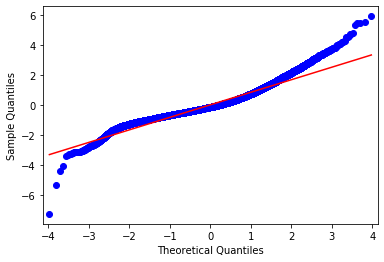

Jarque Bera Test:
Statistic Value: 14279.716727086112 P Value: 0.0


In [119]:
from scipy.stats import jarque_bera
sm.ProbPlot(resid).qqplot(line='s')
plt.show()
stat,pval=jarque_bera(resid)
print('Jarque Bera Test:')
print('Statistic Value:',stat,'P Value:',pval)

<b>We can see that the P Value is less that 0.05 (95% significance). Null Hypothesis is rejected. Hence, Not Normal Distribution.

#### 2.Linearity:
    Ho:Data is linear
    Ha:Data is not linear

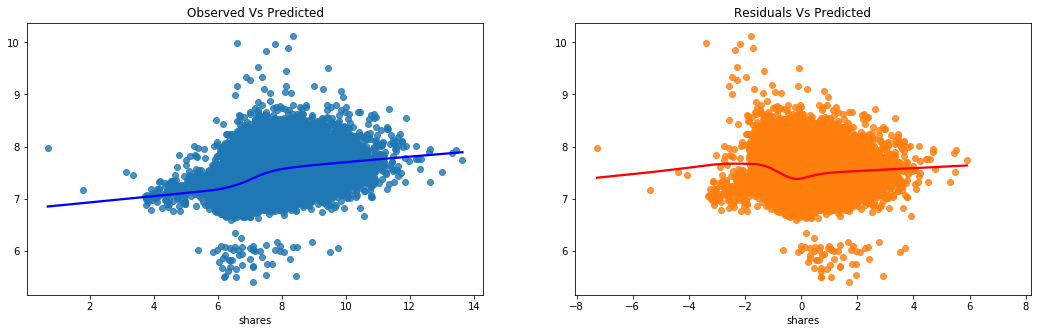

In [121]:
fig,axes=plt.subplots(1,2,figsize=(18,5))
sns.regplot(y,ypred,lowess=True,ax=axes[0],line_kws={'color':'blue'})
sns.regplot(resid,ypred,lowess=True,ax=axes[1],line_kws={'color':'red'})
axes[0].set_title('Observed Vs Predicted')
axes[1].set_title('Residuals Vs Predicted')
plt.show()

In [122]:
print(resid.mean())

-2.1651781332614536e-10


<b>The Mean of the Residuals is close to zero which means the residuals follow linearity.

#### 3. No Auto-Correlation
    Ho:Autocorrelation dosent exists.
    Ha:Autocorrelation exists.

In [126]:
from statsmodels.stats.stattools import durbin_watson

In [127]:
dwstat=durbin_watson(resid)
print('Durbin-Watson Statistic:',dwstat)
if dwstat<2:
    print('Positive Correlation')
elif dwstat>2 and dwstat<4:
    print('Negative Correlation')
else:
    print('No Correlation')

Durbin-Watson Statistic: 1.957292158367176
Positive Correlation


<b>Positive Correlation

#### 4. No Multi-collinearity

In [128]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_values=pd.DataFrame(vif, index=X.columns)

In [157]:
print(vif_values[vif_values[0]>=6].size,vif_values[vif_values[0]>=5].size, vif_values[vif_values[0]>=4].size)

29 31 35


- Depending the VIF values we choose(4,5,6), we can see that huge multicollianearity between the features

#### 5. Homoscadesticity
    Ho:Data is not homoscedastic
    Ha:Data is homoscedastic

In [149]:
import statsmodels.stats.api as sm
stat=sm.het_goldfeldquandt(resid,X)
print('P Value:',stat[1])

P Value: 0.9999999999999999


<b> P Value >0.05, It is Homoscadestic.

### Feature Selection:
#### 1.Step Forward Selection

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [160]:
lin_reg = LinearRegression()
for k in range(25,45,5):
    sfs1 = sfs(lin_reg,k_features =k,forward=True,  floating=False, scoring='neg_mean_squared_error', cv=5)
    sfs1 = sfs1.fit(X, y)
    print("With",k, "features, the Mean Square error is ", -sfs1.k_score_)

With 25 features, the Mean Square error is  0.7174563208730108
With 30 features, the Mean Square error is  0.7174972151819882
With 35 features, the Mean Square error is  0.7165548995128301
With 40 features, the Mean Square error is  0.7168395201197757


#### 2.Backward Elimination

In [162]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_cons = X[cols]
    x_cons = sm.add_constant(x_cons)
    model = sm.OLS(y,x_cons).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_min_max', 'kw_min_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_02', 'LDA_03', 'global_subjectivity', 'global_sentiment_polarity', 'rate_positive_words', 'rate_negative_words', 'min_positive_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity']


In [164]:
X_be = df [selected_features]
X_be = sm.add_constant(X_be)
model_be = sm.OLS(y,X_be).fit()
print('MSE of the model is:',mean_squared_error(model_be.predict(X_be),y ) )

MSE of the model is: 0.6981083736920111


#### 3.Recursive Feature Elimination

In [167]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,60)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = mean_squared_error(model.predict(X_test_rfe) , y_test )
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("MSE with %d features: %f" % (nof, high_score))

Optimum number of features: 2
MSE with 2 features: 0.824279


With RFE , there is no improvent

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

##### Defining Functions for training the models

In [20]:
#KFlod
def cv_(X,y,model):
    idx = str(model).split("(")[0]
    kv=KFold(n_splits= 10 ,shuffle=False, random_state=42)
    cv_score = cross_validate(model, X, y, scoring = "neg_mean_squared_error" , cv = 5 , n_jobs = -1, return_train_score= True, return_estimator=True)
    model_score = pd.DataFrame(columns = ["Train_score","Train_bias", "Train_mean_score", "Test_mean_score", "estimator"])
    model_score.loc[idx]= [ cv_score["train_score"], cv_score["test_score"], np.mean(cv_score["train_score"]), np.mean(cv_score["test_score"]), cv_score["estimator"]]
    return model_score["Train_mean_score"],model_score["Test_mean_score"]

## Grid Search CV

def grid_search_(X,y,model,params):
    gv_model = GridSearchCV (estimator = model,     param_grid = params,     scoring="neg_mean_squared_error", n_jobs = -1, cv = 5, verbose = 2)
    gv_model.fit(X,y)
    print("best_estimator : " ,gv_model.best_estimator_)
    print("best_score : " , gv_model.best_score_)
    return gv_model.best_params_

## RandomizedSearchCV

def random_search_(X,y,model,params):
    rd_model = RandomizedSearchCV (estimator = model,     param_distributions = params,  n_iter=100,   scoring="neg_mean_squared_error", n_jobs = -1, cv = 5, verbose = 2,random_state= 42)
    rd_model.fit(X,y)
    print("best_estimator : ", rd_model.best_estimator_)
    print("best_score : ", rd_model.best_score_)
    return rd_model.best_params_
    
#model_

def model_(X_train, X_test, y_train, y_test, model):
    model = model
    model.fit(X_train,y_train)
    print("Train - MSE : ", mse(y_train, model.predict(X_train)))
    print("Test - MSE : ", mse(y_test, model.predict(X_test)))

### Regularization

#### 1.Ridge Regression

In [196]:
cv_(X,y,Ridge())

(Ridge   -0.695204
 Name: Train_mean_score, dtype: float64, Ridge   -0.963082
 Name: Test_mean_score, dtype: float64)

In [170]:
model_(X_train, X_test, y_train, y_test,  Ridge(alpha=1) )

Train :  0.6949380461922544
Test :  0.7119081764631213


In [180]:
params = {'alpha':randint(1,100)}
random_search_(X,y,Ridge(),params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   10.8s


best_estimator :  Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
best_score :  -0.9633616700594002


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   18.0s finished


In [191]:
params = {'alpha':np.linspace(0.01,2,10)}
grid_search_(X,y,Ridge(),params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


best_estimator :  Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
best_score :  -0.9628597303106436


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.4s finished


#### 2.Lasso

In [198]:
cv_(X,y,Lasso())

(Lasso   -0.77282
 Name: Train_mean_score, dtype: float64, Lasso   -0.863409
 Name: Test_mean_score, dtype: float64)

In [199]:
model_(X_train, X_test, y_train, y_test,  Lasso(alpha=1) )

Train :  0.7702165692942399
Test :  0.7858952206444785


In [200]:
params = {'alpha':randint(1,100)}
random_search_(X,y,Lasso(),params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   23.5s finished


best_estimator :  Lasso(alpha=6, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)
best_score :  -0.8590042493535491


In [202]:
params = {'alpha':np.linspace(5,7,25)}
grid_search_(X,y,Lasso(),params)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.0s


best_estimator :  Lasso(alpha=6.416666666666666, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
best_score :  -0.8588933974413294


[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    7.7s finished


#### 3.Elastic Net Regression 

In [205]:
elastic = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

elastic.fit(X,y)

print('Optimal alpha: %.8f'%elastic.alpha_)
print('Optimal l1_ratio: %.3f'%elastic.l1_ratio_)
print('Number of iterations %d'%elastic.n_iter_)

Optimal alpha: 0.00025755
Optimal l1_ratio: 0.900
Number of iterations 9


In [211]:
y_pred_train=elastic.predict(X_train)
y_pred_test=elastic.predict(X_test)

print('MSE Of train:',mean_squared_error(y_train,y_pred_train))
print('MSE Of test:',mean_squared_error(y_test,y_pred_test))

MSE Of train: 0.738567085777615
MSE Of test: 0.7539040865129994


## Non-Linear Models

##### Comparing models

In [217]:
algorithms = [
            DecisionTreeRegressor(random_state = 42),
            RandomForestRegressor(random_state = 42),
            KNeighborsRegressor(),
            AdaBoostRegressor(),
            BaggingRegressor(),
            GradientBoostingRegressor(),
            XGBRegressor(),
            LGBMRegressor(),
            SVR()]

mse_scores = pd.DataFrame(columns = ["Train_score","Test_score", "Train_mean_score", "Test_mean_score"])

def build_model_mse(X,y,model):
    idx = str(model).split("(")[0]
    kv=KFold(n_splits= 10 ,shuffle=False, random_state=42)
    cv_score = cross_validate(model, X, y, scoring = "neg_mean_squared_error" , cv = 5 , n_jobs = -1, return_train_score= True)
    mse_scores.loc[idx] =  [ cv_score["train_score"], cv_score["test_score"], np.mean(cv_score["train_score"]), np.mean(cv_score["test_score"])]     

In [218]:
for alg in algorithms:
    build_model_mse(X,y,alg)
    
mse_scores[[ "Train_mean_score", "Test_mean_score"]]

,Train_mean_score,Test_mean_score
DecisionTreeRegressor,-1.993758e-33,-1.620499
RandomForestRegressor,-1.356091e-01,-0.817309
KNeighborsRegressor,-6.058626e-01,-0.940220
AdaBoostRegressor,-9.742227e-01,-0.977136
BaggingRegressor,-1.333719e-01,-0.820163
GradientBoostingRegressor,-6.284071e-01,-0.720668
XGBRegressor,-6.296427e-01,-0.719909
LGBMRegressor,-4.967486e-01,-0.726665
SVR,-1.714207e-01,-0.824166


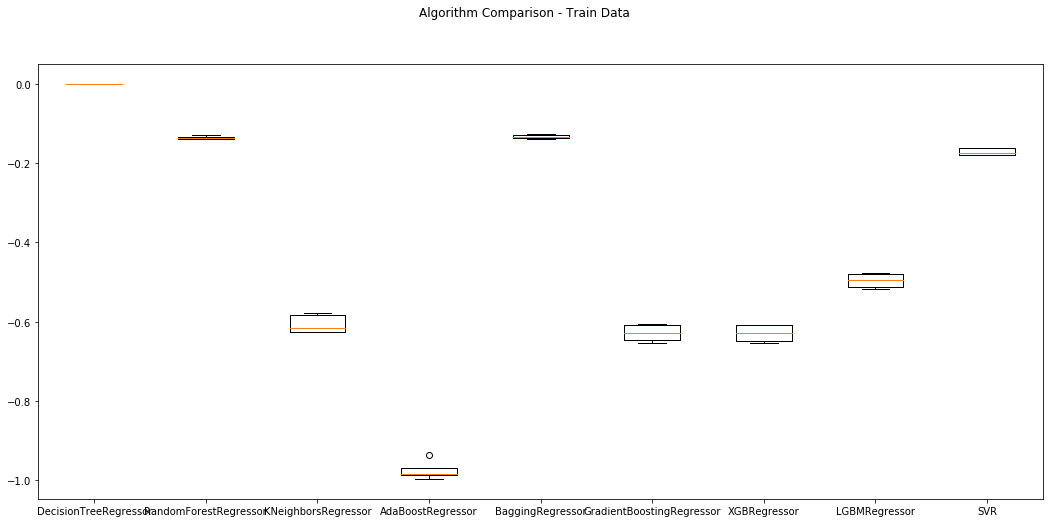

In [233]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(18,8))
fig.suptitle('Algorithm Comparison - Train Data')
ax = fig.add_subplot(111)
plt.boxplot(mse_scores["Train_score"])
ax.set_xticklabels(mse_scores.index)
plt.show()

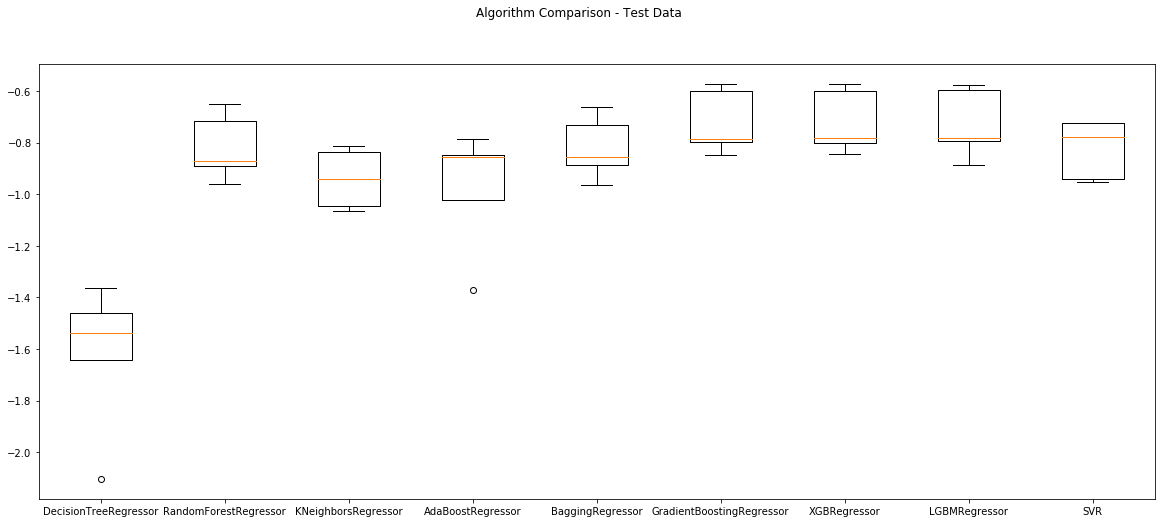

In [232]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(20,8))
fig.suptitle('Algorithm Comparison - Test Data')
ax = fig.add_subplot(111)
plt.boxplot(mse_scores["Test_score"])
ax.set_xticklabels(mse_scores.index)
plt.show()

#### Random Forest Regressor

In [236]:
model_(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state = 42, ))

Train - MSE :  0.13197259638033793
Test - MSE :  0.7697865419296902


In [238]:
params= {'max_depth':range(1,16),
                         'min_samples_split':range(2,16),
                         'min_samples_leaf':range(1,16),
                         'max_features':['auto','sqrt','log2']}
random_search_(X,y,RandomForestRegressor(random_state = 42),params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.9min finished


best_estimator :  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=14, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
best_score :  -0.7252002390414898


In [239]:
cv_(X,y,RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=14, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False))

(RandomForestRegressor   -0.645203
 Name: Train_mean_score, dtype: float64, RandomForestRegressor   -0.725197
 Name: Test_mean_score, dtype: float64)

#### Decision Tree Regressor

In [240]:
model_(X_train, X_test, y_train, y_test, DecisionTreeRegressor(random_state = 42, ))

Train - MSE :  2.3818264046528134e-33
Test - MSE :  1.4457311829444066


In [241]:
params = {"max_depth" : range(1,50,5), "min_samples_leaf" : range(1,40,5)}
grid_search_(X,y,DecisionTreeRegressor(random_state = 42),params)   

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  3.7min finished


best_estimator :  DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=36,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
best_score :  -0.7662242489592792


In [243]:
cv_(X,y,DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=36,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best'))

(DecisionTreeRegressor   -0.68294
 Name: Train_mean_score, dtype: float64, DecisionTreeRegressor   -0.76622
 Name: Test_mean_score, dtype: float64)

In [252]:
params = {'max_depth':np.arange(2,20),'min_samples_split':np.arange(2,20),
          'max_leaf_nodes':np.arange(2,20),'max_features':['auto','sqrt','log2']}
best_par = random_search_(X,y,DecisionTreeRegressor(random_state = 42),params)
cv_(X,y, DecisionTreeRegressor(**best_par) )

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   47.7s finished


best_estimator :  DecisionTreeRegressor(criterion='mse', max_depth=14, max_features='auto',
                      max_leaf_nodes=18, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=14, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')
best_score :  -0.7432033199759313


(DecisionTreeRegressor   -0.709881
 Name: Train_mean_score, dtype: float64, DecisionTreeRegressor   -0.7432
 Name: Test_mean_score, dtype: float64)

#### KNN Regressor

In [18]:
for n in [3,6,9,12,15]:
    knn_sc = cv_(X,y,KNeighborsRegressor(n_neighbors=n) )
    print("n_neighbors :",n,"Train : " ,np.mean( knn_sc["Train_mean_score"]), "Test : ", knn_sc["Test_mean_score"] )

n_neighbors : 3 Train :  -0.5034641826251882 Test :  KNeighborsRegressor   -1.04864
Name: Test_mean_score, dtype: float64
n_neighbors : 6 Train :  -0.6389210110945636 Test :  KNeighborsRegressor   -0.934609
Name: Test_mean_score, dtype: float64
n_neighbors : 9 Train :  -0.6821708559023577 Test :  KNeighborsRegressor   -0.898217
Name: Test_mean_score, dtype: float64
n_neighbors : 12 Train :  -0.706120859217571 Test :  KNeighborsRegressor   -0.877775
Name: Test_mean_score, dtype: float64
n_neighbors : 15 Train :  -0.7217249772182106 Test :  KNeighborsRegressor   -0.87259
Name: Test_mean_score, dtype: float64


In [19]:
model_(X_train, X_test, y_train, y_test, KNeighborsRegressor(n_neighbors=30) )

Train :  0.7539480727696087
Test :  0.8220196766783407


#### Ada Boost Regressor

In [ ]:
# rfr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
#                       max_features='sqrt', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=14, min_samples_split=2,
#                       min_weight_fraction_leaf=0.0, n_estimators=10,
#                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
#                       warm_start=False)
dr=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=36,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=42, splitter='best')
params={
    'base_estimator':[dr ],
    'n_estimators' : [100,200,300],
    'loss':['linear', 'square', 'exponential'] }

best_par = random_search_(X,y,AdaBoostRegressor(),params)


In [27]:
cv_(X,yAdaBoostRegressor(random_state=42) )

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=42)

In [36]:
ada=AdaBoostRegressor(base_estimator=rfr,loss='exponential',n_estimators=15,random_state=42)
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators='warn',
                                                       n_jobs=None,
                                                       oob_score=False,
                    

In [37]:
y_train_pred=ada.predict(x_train)
y_test_pred=ada.predict(x_test)

In [38]:
adab_train_score=ada.score(x_train,y_train)
adab_test_score=ada.score(x_test, y_test)

print("Ada Boost regressor train score :", adab_train_score)
print("Ada Boost regression test score :", adab_test_score)

Ada Boost regressor train score : 0.928399363307318
Ada Boost regression test score : 0.16255939754499737


In [42]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.058088098840300056
MSE Of test: 0.6919021175348553


#### Bagging Regressor

In [44]:
bag=BaggingRegressor(random_state=42)
bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=42, verbose=0,
                 warm_start=False)

In [45]:
y_train_pred=bag.predict(x_train)
y_test_pred=bag.predict(x_test)

bag_train_score=bag.score(x_train,y_train)
bag_test_score=bag.score(x_test, y_test)

In [48]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.13203076027146346
MSE Of test: 0.7682245955971446


In [317]:
br=BaggingRegressor()
params={
    'base_estimator':[lnr,ridge,dr,rfr],
    'n_estimators':randint(1,20)
 }
rsearch=RandomizedSearchCV(br,params,cv=5,scoring='neg_mean_squared_error',n_jobs=-1, 
                           random_state=42)
rsearch.fit(x,y)
print(rsearch.best_params_)
print(rsearch.best_score_)

{'base_estimator': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False), 'n_estimators': 12}
-0.7395400469400714


In [49]:
br=BaggingRegressor(base_estimator=rfr,random_state=42)
br.fit(x_train,y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True,
                                                      criterion='mse',
                                                      max_depth=None,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      n_estimators='warn',
                                                      n_jobs=None,
                                                      oob_score=False,
                                 

In [50]:
y_train_pred=br.predict(x_train)
y_test_pred=br.predict(x_test)

In [51]:
br_train_score=br.score(x_train,y_train)
br_test_score=br.score(x_test, y_test)

print("Bagging regressor train score :", br_train_score)
print("Bagging regression test score :", br_test_score)

Bagging regressor train score : 0.6902806607020606
Bagging regression test score : 0.1661895895577672


In [ ]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

#### Gradient Boosting Regresssor

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

In [53]:
grad=GradientBoostingRegressor(random_state=42)
grad.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
y_train_pred=grad.predict(x_train)
y_test_pred=grad.predict(x_test)

In [56]:
gradb_train_score=grad.score(x_train,y_train)
gradb_test_score=grad.score(x_test, y_test)

print("Gradient Boosting regressor train score :", gradb_train_score)
print("Gradient Boosing regressor test score :", gradb_test_score)

Gradient Boosting regressor train score : 0.23379463693752245
Gradient Boosing regressor test score : 0.1770416876673263


In [57]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))


MSE Of train: 0.6216063839288472
MSE Of test: 0.6799366991242619


#### Light GBM Regressor

In [72]:
import lightgbm as lgb

In [73]:
gbm=lgb.LGBMRegressor()
gbm.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [74]:
y_train_pred=gbm.predict(x_train)
y_test_pred=gbm.predict(x_test)

In [75]:
lgbm_train_score=gbm.score(x_train,y_train)
lgbm_test_score=gbm.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.4077764748513514
LGBM regressor test score : 0.184790794680454


In [76]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.4804585580996883
MSE Of test: 0.6735343064821218


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import random
import scipy.stats as st

gbm=lgb.LGBMRegressor()

params={
    'num_leaves':randint(0,100),
    'max_depth':randint(0,20),
    'learning_rate': st.uniform(0,1),
    'n_estimators':randint(0,200),
    'reg_alpha':st.uniform(0,1),
    'reg_lambda':st.uniform(0,1) }

rsearch1=RandomizedSearchCV(gbm,params,cv=7,random_state=42,scoring='neg_mean_squared_error',n_jobs=1)

rsearch1.fit(x,y)
rsearch1.best_params_

###### LGBM Boosting Type=default

In [77]:
gbm1=lgb.LGBMRegressor(learning_rate= 0.056411579027100256,
 max_depth= 11,
 n_estimators= 157,
 num_leaves= 37,
 reg_alpha=0.0007787658410143283,
 reg_lambda= 0.9922115592912175)

gbm1.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.056411579027100256,
              max_depth=11, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=157, n_jobs=-1, num_leaves=37,
              objective=None, random_state=None,
              reg_alpha=0.0007787658410143283, reg_lambda=0.9922115592912175,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [93]:
y_train_pred=gbm1.predict(x_train)
y_test_pred=gbm1.predict(x_test)

In [79]:
lgbm_train_score=gbm1.score(x_train,y_train)
lgbm_test_score=gbm1.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.41739381468227943
LGBM regressor test score : 0.18888588246901705


In [80]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.47265621146585174
MSE Of test: 0.6701509024483412


###### LGBM Boosting Type=dart

In [85]:
gbm2=lgb.LGBMRegressor(boosting_type='dart',
                      learning_rate= 0.7553614103176525,
 max_depth= 5,
 n_estimators= 53,
 num_leaves= 3,
 reg_alpha= 0.18485445552552704,
 reg_lambda= 0.9695846277645586)

gbm2.fit(x_train,y_train)

LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.7553614103176525,
              max_depth=5, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=53, n_jobs=-1, num_leaves=3,
              objective=None, random_state=None, reg_alpha=0.18485445552552704,
              reg_lambda=0.9695846277645586, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [86]:
y_train_pred=gbm2.predict(x_train)
y_test_pred=gbm2.predict(x_test)

In [87]:
lgbm_train_score=gbm2.score(x_train,y_train)
lgbm_test_score=gbm2.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.19493952526775848
LGBM regressor test score : 0.15925183996720038


In [88]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.653128723273559
MSE Of test: 0.6946348559347337


###### LGBM Boosting Type -Goss

In [89]:
gbm3=lgb.LGBMRegressor(boosting_type='goss',
                       learning_rate= 0.04666566321361543,
 max_depth= 15,
 n_estimators= 14,
 num_leaves= 61,
 reg_alpha= 0.0906064345328208,
 reg_lambda= 0.6183860093330873)
                      
gbm3.fit(x_train,y_train)

LGBMRegressor(boosting_type='goss', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.04666566321361543,
              max_depth=15, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=14, n_jobs=-1, num_leaves=61,
              objective=None, random_state=None, reg_alpha=0.0906064345328208,
              reg_lambda=0.6183860093330873, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [90]:
y_train_pred=gbm3.predict(x_train)
y_test_pred=gbm3.predict(x_test)

In [91]:
lgbm_train_score=gbm3.score(x_train,y_train)
lgbm_test_score=gbm3.score(x_test, y_test)

print("LGBM regressor train score :", lgbm_train_score)
print("LGBM regressor test score :", lgbm_test_score)

LGBM regressor train score : 0.14904412509160236
LGBM regressor test score : 0.1090464043194952


In [94]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))

MSE Of train: 0.47265621146585174
MSE Of test: 0.6701509024483412


#### XG Boost

In [21]:
cv_(X,y,XGBRegressor())

(XGBRegressor   -0.629643
 Name: Train_mean_score, dtype: float64, XGBRegressor   -0.719909
 Name: Test_mean_score, dtype: float64)

In [22]:
print("XGBRegressor Train MSE : 0.629643")
print("XGBRegressor Test MSE : 0.719909")

XGBRegressor Train MSE : 0.629643
XGBRegressor Test MSE : 0.719909


In [39]:
model_(X_train, X_test, y_train, y_test, XGBRegressor())

[09:06:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train - MSE :  0.6225388240629282
Test - MSE :  0.6794956392532387


In [45]:
params = { 'n_estimators': st.randint(0,200),
           'max_depth': st.randint(0,50),
           'learning_rate': st.uniform(0,1),
           'gamma':st.uniform(0,1),
           'reg_alpha':st.uniform(0,1),
            'reg_lambda':st.uniform(0,1),
           'colsample_bytree':st.uniform(0,1) }
xg_boost=XGBRegressor()
rsearch=RandomizedSearchCV(xg_boost,params,cv=7,random_state=42,n_jobs=1,
                           scoring='neg_mean_squared_error',n_iter=100)
rsearch.fit(X,y)
rsearch.best_params_


[09:09:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:09:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:10:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:11:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:11:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:12:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:13:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:14:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

KeyboardInterrupt: 

In [25]:
xg_reg = XGBRegressor(colsample_bytree= 0.4148195023376652,
 gamma= 0.27340707193070624,
 learning_rate= 0.056375496650927115,
 max_depth= 5,
 n_estimators= 196,
 reg_alpha= 0.9997176732861306,
 reg_lambda= 0.9966368370739054)

model_(X_train, X_test, y_train, y_test, xg_reg)

[10:55:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train - MSE :  0.5246878255173391
Test - MSE :  0.6712980404718544


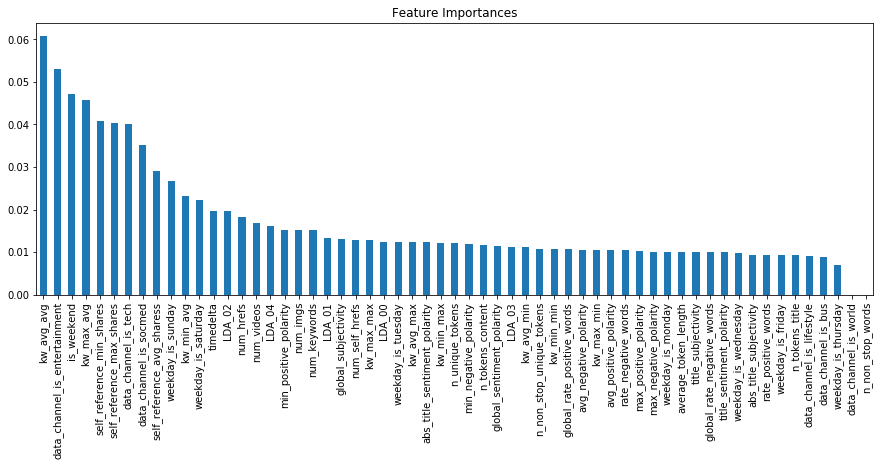

In [30]:
imp = pd.Series(xg_reg.feature_importances_, X.columns).sort_values(ascending=False)
imp.plot(kind='bar', title='Feature Importances', figsize = (15,5))
plt.show()

In [47]:
cv_(X,y,xg_reg)

(XGBRegressor   -0.538821
 Name: Train_mean_score, dtype: float64, XGBRegressor   -0.721994
 Name: Test_mean_score, dtype: float64)

In [48]:
model_(X_train, X_test, y_train, y_test, XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.855325405158244,
             gamma=0.418855052953664, importance_type='gain',
             learning_rate=0.2327070351117842, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.6836286482950855, verbosity=1) )

[09:36:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train - MSE :  0.6319729976290802
Test - MSE :  0.6866191153100658


In [49]:
model_(X_train, X_test, y_train, y_test, XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7230939729486379,
             gamma=0.144875726456884, importance_type='gain',
             learning_rate=0.07836638617620131, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=None, n_estimators=110, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.9232481518257668, verbosity=1) )

[09:36:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train - MSE :  0.6308610859189813
Test - MSE :  0.6820751310313351


In [68]:
xg_reg = xgb.XGBRegressor(colsample_bytree= 0.4148195023376652,
 gamma= 0.27340707193070624,
 learning_rate= 0.056375496650927115,
 max_depth= 5,
 n_estimators= 196,
 reg_alpha= 0.9997176732861306,
 reg_lambda= 0.9966368370739054)

xg_reg.fit(x_train,y_train)
y_train_pred=xg_reg.predict(X_train)
y_test_pred=xg_reg.predict(X_test)

In [69]:
xgreg_train_score=xg_reg.score(x_train,y_train)
xgreg_test_score=xg_reg.score(x_test, y_test)

print("XG bsting regressor train score :", xgreg_train_score)
print("XG boosing regressor test score :", xgreg_test_score)

XG bsting regressor train score : 0.3490827700286653
XG boosing regressor test score : 0.19241125491013789


In [70]:
print('MSE Of train:',mean_squared_error(y_train,y_train_pred))
print('MSE Of test:',mean_squared_error(y_test,y_test_pred))


MSE Of train: 0.5280755330949964
MSE Of test: 0.6672382031476866
